In [ ]:
import pandas as pd
import glob
import seaborn as sns
from plotnine import *

In [ ]:
from knowledge_distillation.io import *

In [ ]:
paths = sorted(glob.glob(str(ASSETS_PATH / '*_evaluation*')))
paths[:5]

['/Users/piazza/Playground/knowledge-distillation/nbs/../assets/identicalnn_0_evaluation.csv',
 '/Users/piazza/Playground/knowledge-distillation/nbs/../assets/identicalnn_1_evaluation.csv',
 '/Users/piazza/Playground/knowledge-distillation/nbs/../assets/nn_0_distilled_evaluation.csv',
 '/Users/piazza/Playground/knowledge-distillation/nbs/../assets/nn_10_evaluation.csv',
 '/Users/piazza/Playground/knowledge-distillation/nbs/../assets/nn_1_distilled_evaluation.csv']

In [ ]:
# remove test notebooks
paths = [p for p in paths if 'test_' not in p]

In [ ]:
results = pd.concat([pd.read_csv(p) for p in paths], ignore_index=True)
results.head()


,model_name,data,accuracy,precision,recall,f1,auc
0,identicalnn_0,train,0.816992,0.839891,0.296172,0.437920,0.639137
1,identicalnn_0,test,0.818824,0.864060,0.295353,0.440228,0.640291
2,identicalnn_1,train,0.816992,0.839891,0.296172,0.437920,0.639137
3,identicalnn_1,test,0.818824,0.864060,0.295353,0.440228,0.640291
4,nn_0_distilled,train,0.839642,0.728543,0.532057,0.614988,0.734605


In [ ]:
from typing import NamedTuple
from pandas.testing import assert_series_equal

class ModelTypes(NamedTuple):
    single:str = 'single'
    ensemble:str = 'ensemble'
    distilled:str = 'distilled'
        
model_types = ModelTypes()

def get_model_type(model_names):
    types = []
    for name in model_names:
        ending = name.split("_")[-1]
        if ending == 'ensemble':
            types.append(model_types.ensemble)
        elif ending == 'distilled':
            types.append(model_types.distilled)
        else:
            types.append(model_types.single)
            
    return pd.Categorical(
        types, 
        categories=[model_types.single, model_types.ensemble, model_types.distilled]
    )
    
#test
assert all(get_model_type(['nn_0', 'logr_distilled', 'funk_ensemble']) 
           == [model_types.single, model_types.distilled, model_types.ensemble])


In [ ]:
results = (results
           .assign(
               model_prefix = results.model_name.apply(lambda x: x.split('_')[0]),
               model_type = get_model_type(results.model_name),
               data = lambda x: pd.Categorical(x.data, categories=['train', 'test'])
           )
          )

results.head()

,model_name,data,accuracy,precision,recall,f1,auc,model_prefix,model_type
0,identicalnn_0,train,0.816992,0.839891,0.296172,0.437920,0.639137,identicalnn,single
1,identicalnn_0,test,0.818824,0.864060,0.295353,0.440228,0.640291,identicalnn,single
2,identicalnn_1,train,0.816992,0.839891,0.296172,0.437920,0.639137,identicalnn,single
3,identicalnn_1,test,0.818824,0.864060,0.295353,0.440228,0.640291,identicalnn,single
4,nn_0_distilled,train,0.839642,0.728543,0.532057,0.614988,0.734605,nn,distilled


In [ ]:
nn = results.query("model_prefix == 'nn'")

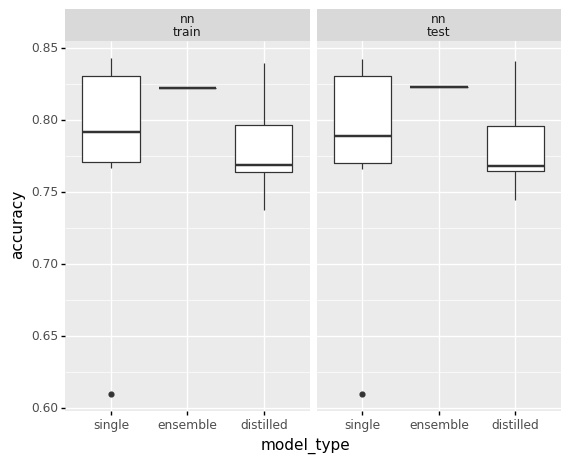

<ggplot: (8778402967830)>

In [ ]:
(ggplot(aes('model_type', 'accuracy'), data=nn)
 + geom_boxplot()
 + facet_wrap(('model_prefix', 'data'), ncol=2)
)


In [ ]:
nn.sort_values(['model_type', 'model_name'])

,model_name,data,accuracy,precision,recall,f1,auc,model_prefix,model_type
10,nn_1,train,0.833845,0.643385,0.694896,0.668149,0.786395,nn,single
11,nn_1,test,0.834024,0.645314,0.692553,0.668099,0.785774,nn,single
6,nn_10,train,0.838107,0.774245,0.462201,0.578847,0.709738,nn,single
7,nn_10,test,0.842008,0.783473,0.476766,0.592798,0.717440,nn,single
14,nn_2,train,0.819295,0.847179,0.304147,0.447600,0.643377,nn,single
15,nn_2,test,0.820359,0.867890,0.301082,0.447070,0.643257,nn,single
18,nn_3,train,0.784628,0.949591,0.111164,0.199029,0.554647,nn,single
19,nn_3,test,0.780900,0.950000,0.096754,0.175621,0.547567,nn,single
22,nn_4,train,0.798679,0.931818,0.176555,0.296862,0.586230,nn,single
23,nn_4,test,0.796714,0.936396,0.168682,0.285868,0.582520,nn,single


In [ ]:
results.model_prefix.value_counts()

nn             42
identicalnn     4
Name: model_prefix, dtype: int64

# Proof #1 setting the seed produce reproducible results

In [ ]:
nn_same_seed = results.query("model_prefix == 'identicalnn'")

In [ ]:
nn_same_seed.sort_values('data')

,model_name,data,accuracy,precision,recall,f1,auc,model_prefix,model_type
0,identicalnn_0,train,0.816992,0.839891,0.296172,0.437920,0.639137,identicalnn,single
2,identicalnn_1,train,0.816992,0.839891,0.296172,0.437920,0.639137,identicalnn,single
1,identicalnn_0,test,0.818824,0.864060,0.295353,0.440228,0.640291,identicalnn,single
3,identicalnn_1,test,0.818824,0.864060,0.295353,0.440228,0.640291,identicalnn,single


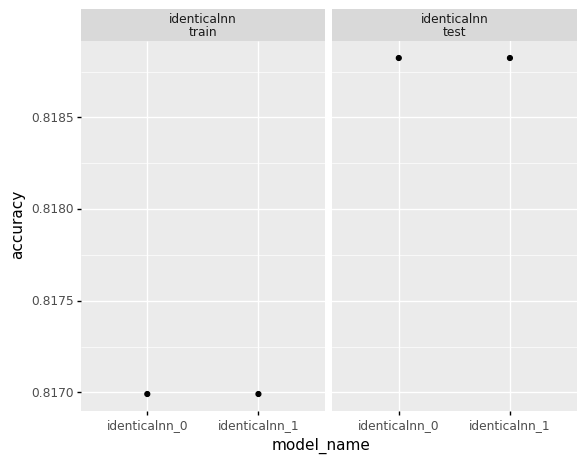

<ggplot: (8778404783312)>

In [ ]:
(ggplot(aes('model_name', 'accuracy'), data=nn_same_seed)
 + geom_point()
 + facet_wrap(('model_prefix', 'data'), ncol=2)
)



In [ ]:
lr = results.query("model_prefix == 'lr'")

In [ ]:
(ggplot(aes('model_type', 'accuracy'), data=lr)
 + geom_boxplot()
 + facet_wrap(('model_prefix', 'data'), ncol=2)
)



PlotnineError: 'Faceting variables must have at least one value'

In [ ]:
rf = results.query("model_prefix == 'rf'")

In [ ]:
(ggplot(aes('model_type', 'accuracy'), data=rf)
 + geom_boxplot()
 + facet_wrap(('model_prefix', 'data'), ncol=2)
)



PlotnineError: 'Faceting variables must have at least one value'